# Import libraries

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load train dateset

In [2]:
train = pd.read_csv("train_data.csv")
pd.set_option('display.max_columns', 50)
train.head(10)

,client_id,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,customer_children,customer_relationship,target
0,910train42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,20,0,0,590,0,22000,0,0,1.0,1.0,1983-03,1994-08,1,1943-09,3630,9.0,0,0.0,NaN,NaN,0
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,940,0,10570,0,0,1.0,1.0,2017-01,2017-01,1,1994-02,2460,9.0,0,NaN,mature,couple,0
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,320,0,0,1210,0,15200,0,0,1.0,1.0,1980-12,1980-12,2,1936-10,2660,9.0,0,NaN,NaN,single,0
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,160,0,0,0,0,29020,0,0,1.0,1.0,1998-08,2013-10,1,1946-09,6600,9.0,0,NaN,NaN,NaN,0
4,c078009957trainfb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13650,0,0,1.0,1.0,2012-11,2012-11,2,1996-04,8550,9.0,0,NaN,mature,couple,1
5,f7bae3a0fefd323ecf7d4a2fab4e7826,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4150,0,0,0,4150,1.0,1.0,2004-08,2015-08,2,1963-11,1430,NaN,0,NaN,no,couple,0
6,e1b2293260bd55bc20700f122d70480f,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,48170,0,0,1.0,1.0,2012-03,2012-03,2,1950-10,2860,9.0,0,NaN,no,couple,0
7,2063dc028a989d9752b9565bd42a4eff,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,27080,0,0,1.0,1.0,1992-02,1992-02,2,1942-04,8570,9.0,0,NaN,no,couple,0
8,fbb7fcacec0c6a0199e0d012cbf63fed,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9680,0,0,1.0,1.0,2006-10,2006-10,2,1998-06,9320,9.0,0,NaN,mature,couple,0
9,5c9b1a4b7b9255d5d9d9fac3328a26a4,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,70,0,0,13570,0,8850,0,0,1.0,1.0,1975-01,1996-07,1,1938-01,2220,9.0,0,NaN,no,couple,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   client_id                          63697 non-null  object 
 1   homebanking_active                 63697 non-null  int64  
 2   has_homebanking                    63697 non-null  int64  
 3   has_insurance_21                   63697 non-null  int64  
 4   has_insurance_23                   63697 non-null  int64  
 5   has_life_insurance_fixed_cap       63697 non-null  int64  
 6   has_life_insurance_decreasing_cap  63697 non-null  int64  
 7   has_fire_car_other_insurance       63697 non-null  int64  
 8   has_personal_loan                  63697 non-null  int64  
 9   has_mortgage_loan                  63697 non-null  int64  
 10  has_current_account                63697 non-null  int64  
 11  has_pension_saving                 63697 non-null  int

In [4]:
train.shape

(63697, 40)

In [5]:
train.describe().loc[['count', 'min', 'max', 'mean', 'std'], :]

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_gender,customer_postal_code,customer_occupation_code,customer_self_employed,customer_education,target
count,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,63697.000000,61695.000000,63697.000000,16572.000000,63697.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1000.000000,0.000000,0.000000,0.000000,-330.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,9890.000000,220000.000000,780000.000000,3000.000000,71690.000000,490000.000000,20000.000000,41170.000000,50000.000000,24050.000000,19790.000000,7.000000,6.000000,2.000000,9992.000000,9.000000,1.000000,6.000000,1.000000
mean,0.215191,0.280939,0.095028,0.009953,0.002747,0.111779,0.318053,0.041619,0.098089,0.500809,0.021963,0.970956,0.005919,0.017960,457.960187,47.432375,78.260044,11565.570592,183.667049,402.469347,8868.815486,1323.660612,233.421982,17872.484889,57.641176,30.320894,1.230199,1.042608,1.486444,5577.261959,8.773531,0.087021,2.463734,0.030033
std,0.410958,0.449462,0.293256,0.099270,0.052344,0.315097,0.465724,0.199718,0.297438,0.500003,0.146565,0.167931,0.076705,0.132807,1641.970743,536.978630,2538.927213,40229.761726,368.599652,2662.560352,35525.256697,2685.727023,2140.173418,11750.868466,892.959859,407.877892,0.501498,0.224991,0.499820,3020.064554,1.131453,0.281869,1.520309,0.170679


In [6]:
train[['target']].value_counts()

target
0         61784
1          1913
dtype: int64

# Data cleansing

In [7]:
# Columns have null value
col_null = train.columns[train.isna().any()].tolist()
train[col_null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_since_all        63463 non-null  object 
 1   customer_since_bank       63448 non-null  object 
 2   customer_occupation_code  61695 non-null  float64
 3   customer_education        16572 non-null  float64
 4   customer_children         40333 non-null  object 
 5   customer_relationship     48798 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.9+ MB


In [8]:
train_null = train[col_null]
train_null.isnull().sum()

customer_since_all            234
customer_since_bank           249
customer_occupation_code     2002
customer_education          47125
customer_children           23364
customer_relationship       14899
dtype: int64

## Examine null columns 

In [9]:
train_null.head()

,customer_since_all,customer_since_bank,customer_occupation_code,customer_education,customer_children,customer_relationship
0,1983-03,1994-08,9.0,0.0,NaN,NaN
1,2017-01,2017-01,9.0,NaN,mature,couple
2,1980-12,1980-12,9.0,NaN,NaN,single
3,1998-08,2013-10,9.0,NaN,NaN,NaN
4,2012-11,2012-11,9.0,NaN,mature,couple


## customer_occupation_code

Proportion of null value: 0.03


<AxesSubplot:xlabel='customer_occupation_code'>

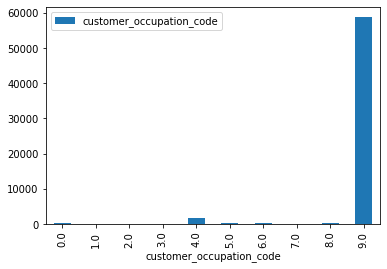

In [10]:
col = 'customer_occupation_code'
pro = train[col].isnull().sum()/train.shape[0]
print("Proportion of null value: {:.2f}".format(pro))

temp = train[['customer_occupation_code']]
temp = temp.groupby(by = ['customer_occupation_code']).agg({'customer_occupation_code': 'count'})
temp.plot(kind = 'bar')

In [11]:
# impute null values with the mode
mode = train['customer_occupation_code'].mode()[0]
train['customer_occupation_code'].fillna(value = mode, inplace = True)

col = 'customer_occupation_code'
pro = train[col].isnull().sum()/train.shape[0]
print("Proportion of null value: {:.2f}".format(pro))

Proportion of null value: 0.00


## customer_education

Proportion of null value: 0.74


<AxesSubplot:xlabel='customer_education'>

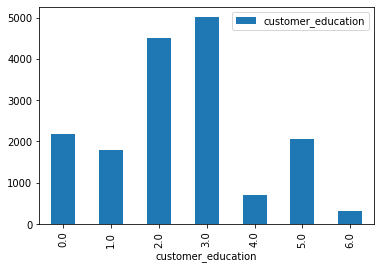

In [12]:
col = 'customer_education'
pro = train[col].isnull().sum()/train.shape[0]
print("Proportion of null value: {:.2f}".format(pro))

temp = train[['customer_education']]
temp = temp.groupby(by = ['customer_education']).agg({'customer_education': 'count'})
temp.plot(kind = 'bar')

In [13]:
# drop the column
train.drop(columns = 'customer_education', inplace = True)

## customer_children

Proportion of null value: 0.37


<AxesSubplot:xlabel='customer_children'>

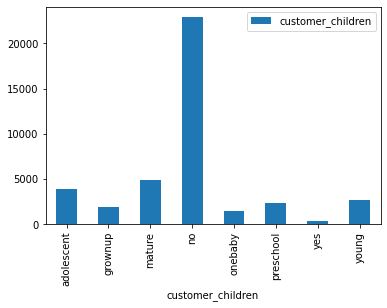

In [14]:
col = 'customer_children'
pro = train[col].isnull().sum()/train.shape[0]
print("Proportion of null value: {:.2f}".format(pro))

temp = train[['customer_children']]
temp = temp.groupby(by = ['customer_children']).agg({'customer_children': 'count'})
temp.plot(kind = 'bar', label = temp['customer_children'])

In [15]:
# drop the column
train.drop(columns = 'customer_children', inplace = True)

## customer_relationship       

Proportion of null value: 0.23


<AxesSubplot:xlabel='customer_relationship'>

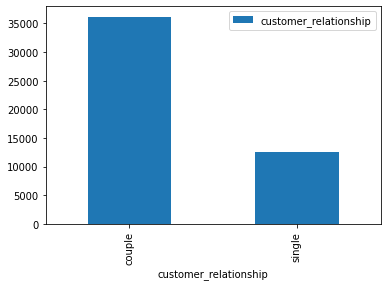

In [16]:
col = 'customer_relationship'
pro = train[col].isnull().sum()/train.shape[0]
print("Proportion of null value: {:.2f}".format(pro))

temp = train[['customer_relationship']]
temp = temp.groupby(by = ['customer_relationship']).agg({'customer_relationship': 'count'})
temp.plot(kind = 'bar')

In [17]:
# impute null values with the mode
mode = train['customer_relationship'].mode()[0]
train['customer_relationship'].fillna(value = mode, inplace = True)

col = 'customer_relationship'
pro = train[col].isnull().sum()/train.shape[0]
print("Proportion of null value: {:.2f}".format(pro))

Proportion of null value: 0.00


## Drop id columns

In [18]:
train.drop(columns = 'client_id', inplace = True)
train.head()

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_postal_code,customer_occupation_code,customer_self_employed,customer_relationship,target
0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,20,0,0,590,0,22000,0,0,1.0,1.0,1983-03,1994-08,1,1943-09,3630,9.0,0,couple,0
1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,940,0,10570,0,0,1.0,1.0,2017-01,2017-01,1,1994-02,2460,9.0,0,couple,0
2,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,320,0,0,1210,0,15200,0,0,1.0,1.0,1980-12,1980-12,2,1936-10,2660,9.0,0,single,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,160,0,0,0,0,29020,0,0,1.0,1.0,1998-08,2013-10,1,1946-09,6600,9.0,0,couple,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13650,0,0,1.0,1.0,2012-11,2012-11,2,1996-04,8550,9.0,0,couple,1


## Handle null columns with date datatype

In [19]:
# Fill null value with current date
cur_date = '2022-05'
train.fillna(value = cur_date, inplace = True)

In [20]:
# function find months difference with date parameter is string
def diff_month(date):
    # day is 1
    cur_date = datetime(2022, 5, 1)
    date = datetime(int(date[0:4]), int(date[5:7]), 1)
    return (cur_date.year - date.year) * 12 + cur_date.month - date.month

In [21]:
months_diff_all = []
months_diff_bank = []

for row in train['customer_since_all']:
    months_diff_all.append(diff_month(row))
    
for row in train['customer_since_bank']:
    months_diff_bank.append(diff_month(row))

train['customer_since_all'] = months_diff_all
train['customer_since_bank'] = months_diff_bank

In [22]:
# Replace null values (currently are 0) with mean of the attribute
mean = train[train['customer_since_all'] != 0][['customer_since_all']].mean()[0]
train = train.replace({'customer_since_all': 0}, mean)

mean = train[train['customer_since_bank'] != 0][['customer_since_bank']].mean()[0]
train = train.replace({'customer_since_bank': 0}, mean)

In [23]:
# Also customer_birth_date column
customer_birth_date = []
for row in train['customer_birth_date']:
    customer_birth_date.append(diff_month(row))

train['customer_birth_date'] = customer_birth_date

## Drop irrelevant columns

In [24]:
train.drop(columns = ['customer_postal_code'], inplace = True)

In [25]:
train.head(10)

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_gender,customer_birth_date,customer_occupation_code,customer_self_employed,customer_relationship,target
0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,20,0,0,590,0,22000,0,0,1.0,1.0,470.0,333.0,1,944,9.0,0,couple,0
1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,940,0,10570,0,0,1.0,1.0,64.0,64.0,1,339,9.0,0,couple,0
2,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,320,0,0,1210,0,15200,0,0,1.0,1.0,497.0,497.0,2,1027,9.0,0,single,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,160,0,0,0,0,29020,0,0,1.0,1.0,285.0,103.0,1,908,9.0,0,couple,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13650,0,0,1.0,1.0,114.0,114.0,2,313,9.0,0,couple,1
5,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4150,0,0,0,4150,1.0,1.0,213.0,81.0,2,702,9.0,0,couple,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,48170,0,0,1.0,1.0,122.0,122.0,2,859,9.0,0,couple,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,27080,0,0,1.0,1.0,363.0,363.0,2,961,9.0,0,couple,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9680,0,0,1.0,1.0,187.0,187.0,2,287,9.0,0,couple,0
9,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,70,0,0,13570,0,8850,0,0,1.0,1.0,568.0,310.0,1,1012,9.0,0,couple,0


## One-hot Encoding

In [26]:
# Encode multiple features at the same time
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [27]:
features_to_encode = ['customer_gender', 'customer_occupation_code', 'customer_relationship']

# Change data type to string so that the encode can be successed
train[features_to_encode] = train[features_to_encode].astype(str)    

for feature in features_to_encode:
    train = encode_and_bind(train, feature)

In [28]:
train.head(10)

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,has_pension_saving,has_savings_account,has_savings_account_starter,has_current_account_starter,bal_insurance_21,bal_insurance_23,cap_life_insurance_fixed_cap,cap_life_insurance_decreasing_cap,prem_fire_car_other_insurance,bal_personal_loan,bal_mortgage_loan,bal_current_account,bal_pension_saving,bal_savings_account,bal_savings_account_starter,bal_current_account_starter,visits_distinct_so,visits_distinct_so_areas,customer_since_all,customer_since_bank,customer_birth_date,customer_self_employed,target,customer_gender_1,customer_gender_2,customer_occupation_code_0.0,customer_occupation_code_1.0,customer_occupation_code_2.0,customer_occupation_code_3.0,customer_occupation_code_4.0,customer_occupation_code_5.0,customer_occupation_code_6.0,customer_occupation_code_7.0,customer_occupation_code_8.0,customer_occupation_code_9.0,customer_relationship_couple,customer_relationship_single
0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,20,0,0,590,0,22000,0,0,1.0,1.0,470.0,333.0,944,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,940,0,10570,0,0,1.0,1.0,64.0,64.0,339,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,320,0,0,1210,0,15200,0,0,1.0,1.0,497.0,497.0,1027,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,160,0,0,0,0,29020,0,0,1.0,1.0,285.0,103.0,908,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,13650,0,0,1.0,1.0,114.0,114.0,313,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0
5,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,4150,0,0,0,4150,1.0,1.0,213.0,81.0,702,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,48170,0,0,1.0,1.0,122.0,122.0,859,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,27080,0,0,1.0,1.0,363.0,363.0,961,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,9680,0,0,1.0,1.0,187.0,187.0,287,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
9,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,70,0,0,13570,0,8850,0,0,1.0,1.0,568.0,310.0,1012,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


## Change datatype to float

In [29]:
train = train.astype(float)
train['target'] = train['target'].astype(int)

# Data cleaned

In [30]:
train.shape

(63697, 47)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   homebanking_active                 63697 non-null  float64
 1   has_homebanking                    63697 non-null  float64
 2   has_insurance_21                   63697 non-null  float64
 3   has_insurance_23                   63697 non-null  float64
 4   has_life_insurance_fixed_cap       63697 non-null  float64
 5   has_life_insurance_decreasing_cap  63697 non-null  float64
 6   has_fire_car_other_insurance       63697 non-null  float64
 7   has_personal_loan                  63697 non-null  float64
 8   has_mortgage_loan                  63697 non-null  float64
 9   has_current_account                63697 non-null  float64
 10  has_pension_saving                 63697 non-null  float64
 11  has_savings_account                63697 non-null  flo

# Save train set

In [32]:
train.to_csv('train_data_cleaned.csv')